PROBLEM STATEMENT: Classify Alzheimer disease into 4 classes using CNN and tensorflow. 

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

# Table of contents: 
1. Import the dataset
2. Creating a function to view random images
3. Splitting folders into training and testing directories
4. Creating training and testing datasets. 
5. Model creating 
6. Model summary 
7. Plotting loss curves 
8. Others...

### Importing the dataset

In [1]:
# Knowing about the dataset

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 0 images in dataset
There are 0 directories and 896 images in dataset\Mild_Demented
There are 0 directories and 64 images in dataset\Moderate_Demented
There are 0 directories and 3200 images in dataset\Non_Demented
There are 0 directories and 2240 images in dataset\Very_Mild_Demented


In [2]:
# Knowing about the classes

In [3]:
import pathlib
import numpy as np

data_dir_multi = pathlib.Path("dataset")
class_names = np.array(sorted(item.name for item in data_dir_multi.glob("*")))
class_names

array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18')

These are the classes

### Creating a function to view random images

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
    # Creating a target folder
    target_folder = target_dir+target_class
    # Random Image
    random_image = random.sample(os.listdir(target_folder), 1)
    # Plotting image 
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (128, 128)


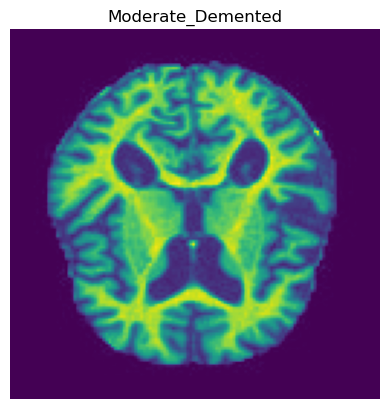

In [5]:
img = view_random_image(target_dir = "dataset/", target_class = "Moderate_Demented")

### Splitting folders and creating train and validation directories

In [7]:
# Splitting the dataset
import splitfolders

splitfolders.ratio("dataset/", output = "output_alz_2", seed = 1345, ratio = (0.8, 0.2)) # 0.8 for training # 0.2 for testing.

Copying files: 6400 files [00:09, 644.17 files/s]


In [3]:
import tensorflow as tf
from tensorflow import keras

### Creating Train and test datasets

In [4]:
train_dir = "output_alz_2/train/"
test_dir = "output_alz_2/val/"

In [9]:
# Train dataset... 
train_ds = tf.keras.preprocessing.image_dataset_from_directory("./output_alz_2/train/", 
                                                              seed = 123,
                                                              image_size = (128, 128),
                                                              batch_size = 64)
# Test dataset... 
test_ds = tf.keras.preprocessing.image_dataset_from_directory("./output_alz_2/val/",
                                                             seed = 123,
                                                             image_size = (128, 128),
                                                             batch_size = 64)

Found 5119 files belonging to 4 classes.
Found 1281 files belonging to 4 classes.


### Model Creating 

In [10]:
# MODEL CREATING 
from tensorflow import keras 
model = keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (128, 128, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(4, activation = "softmax")  
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ['accuracy'])


### Model summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

### Fitting the model

In [12]:
hist = model.fit(train_ds,
                epochs = 10,
                validation_data = test_ds,
                verbose = 1,
                batch_size = 64)

Epoch 1/10
80/80 [==============================] - 58s 696ms/step - loss: 1.2621 - accuracy: 0.4763 - val_loss: 1.0453 - val_accuracy: 0.4996
Epoch 2/10
80/80 [==============================] - 53s 655ms/step - loss: 1.0224 - accuracy: 0.5013 - val_loss: 0.9928 - val_accuracy: 0.5043
Epoch 3/10
80/80 [==============================] - 55s 686ms/step - loss: 0.9799 - accuracy: 0.5132 - val_loss: 0.9413 - val_accuracy: 0.5308
Epoch 4/10
80/80 [==============================] - 54s 678ms/step - loss: 0.9450 - accuracy: 0.5448 - val_loss: 0.8933 - val_accuracy: 0.5753
Epoch 5/10
80/80 [==============================] - 63s 778ms/step - loss: 0.9064 - accuracy: 0.5704 - val_loss: 0.9007 - val_accuracy: 0.5582
Epoch 6/10
80/80 [==============================] - 51s 630ms/step - loss: 0.8875 - accuracy: 0.5819 - val_loss: 0.8599 - val_accuracy: 0.6300
Epoch 7/10
80/80 [==============================] - 50s 618ms/step - loss: 0.8629 - accuracy: 0.5927 - val_loss: 0.8612 - val_accuracy: 0.5769

In [13]:
model.evaluate(test_ds)

21/21 [==============================] - 5s 203ms/step - loss: 0.7415 - accuracy: 0.6378


[0.7414532899856567, 0.6377829909324646]

### Plotting loss curves

In [17]:
def plot_loss_curves(history, figsize):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
    

  # Plot loss
  plt.figure(figsize = figsize)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize = figsize)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

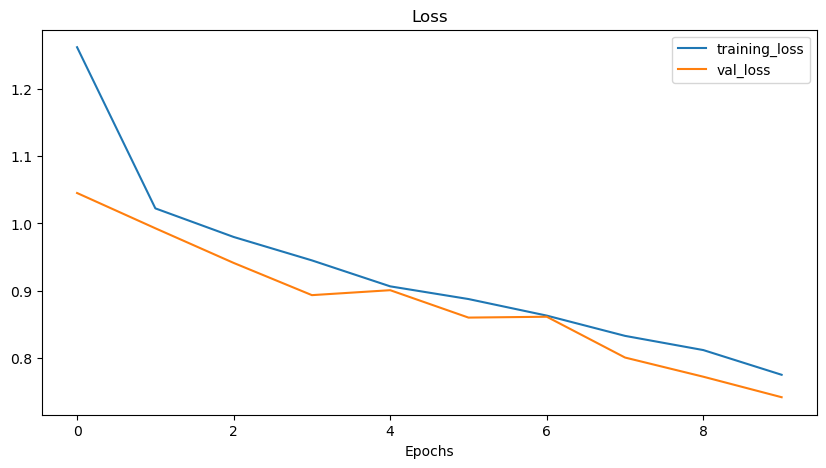

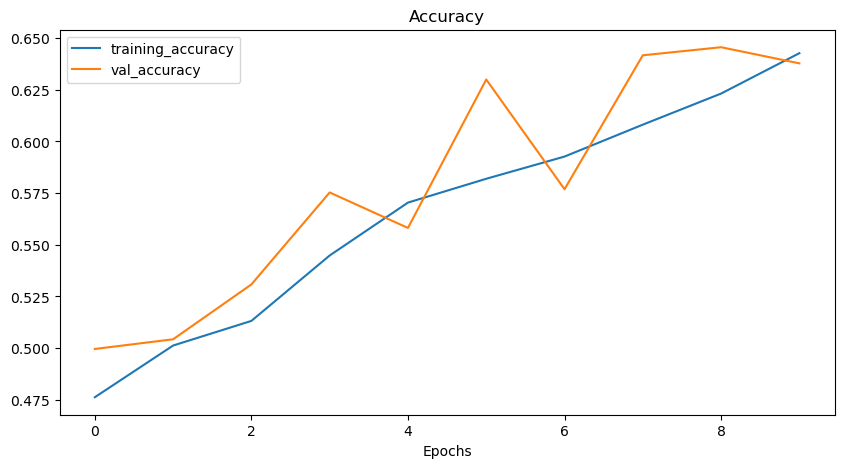

In [18]:
plot_loss_curves(hist, figsize = (10, 5))

### Others...

Hmmmm... it's converging. maybe it would converge better if we let it train for some more epochs. 

In [5]:
### Doing for 150 epochs. Let's see what happens. 

In [19]:
hist_2 = model.fit(train_ds,
                  epochs = 150,
                  validation_data = test_ds,
                  batch_size = 64,
                  verbose = 1)

Epoch 1/150
80/80 [==============================] - 48s 599ms/step - loss: 0.7308 - accuracy: 0.6624 - val_loss: 0.7501 - val_accuracy: 0.6432
Epoch 2/150
80/80 [==============================] - 49s 606ms/step - loss: 0.6986 - accuracy: 0.6847 - val_loss: 0.6313 - val_accuracy: 0.7182
Epoch 3/150
80/80 [==============================] - 53s 661ms/step - loss: 0.6534 - accuracy: 0.7058 - val_loss: 0.5720 - val_accuracy: 0.7791
Epoch 4/150
80/80 [==============================] - 61s 759ms/step - loss: 0.6056 - accuracy: 0.7337 - val_loss: 0.5774 - val_accuracy: 0.7510
Epoch 5/150
80/80 [==============================] - 67s 832ms/step - loss: 0.5631 - accuracy: 0.7507 - val_loss: 0.5123 - val_accuracy: 0.7736
Epoch 6/150
80/80 [==============================] - 57s 712ms/step - loss: 0.5524 - accuracy: 0.7599 - val_loss: 0.4588 - val_accuracy: 0.8150
Epoch 7/150
80/80 [==============================] - 51s 631ms/step - loss: 0.4946 - accuracy: 0.7912 - val_loss: 0.4340 - val_accuracy:

In [20]:
model.evaluate(test_ds)

21/21 [==============================] - 7s 271ms/step - loss: 0.0182 - accuracy: 0.9945


[0.018151961266994476, 0.994535505771637]

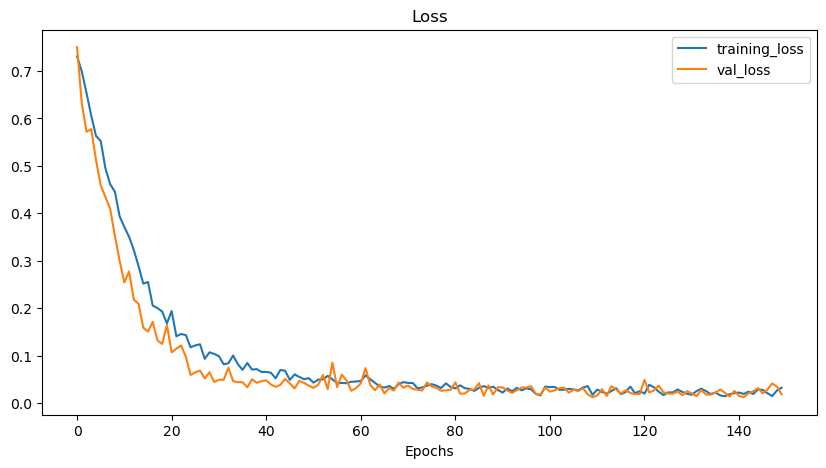

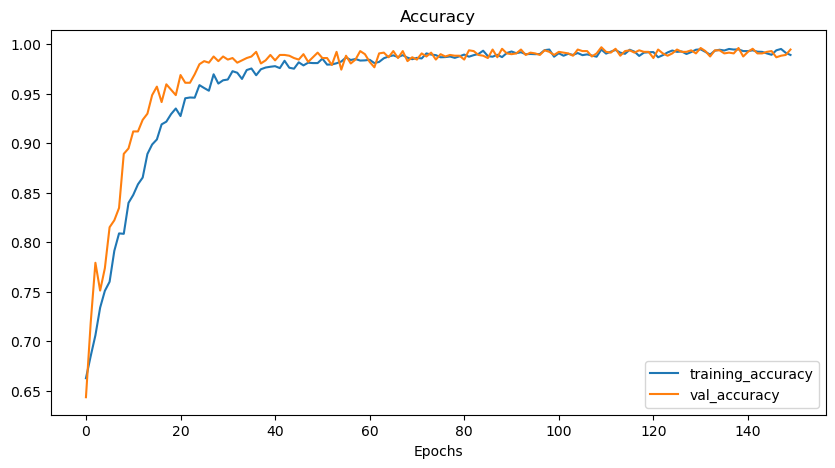

In [22]:
plot_loss_curves(history = hist_2, figsize = (10, 5))

It's fully converged. MISSION ACCOMPLISHED. 

Thank you!!!